In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [39]:
# Jupiter's parameter based on the following table).
# http://pds-atmospheres.nmsu.edu/education_and_outreach/encyclopedia/gas_constant.htm

# Universal gas constant 
Runiv = 8.3143 #J/K/mol,

# <mw>air = 28.964 gm/mole
# kappa ident Rg/Cp = Runiv/cp
# gamma ident Cp/Cv = cp/cv
# <mw>    Rgas     Cp      kappa      gamma 
# gm/mole	J/gm/K	J/gm/K	
# Venus 44.01	0.18892	0.8501	0.2222	1.2857
# Earth	28.96	0.28710	1.0040	0.2860	1.4005
# Mars	44.01	0.18892	0.8312	0.2273	1.2941
# Jupiter	2.22	3.74518	12.3591	0.3030	1.4348
# Saturn	2.14	3.89246	14.0129	0.2778	1.3846
# Uranus	2.30	3.61491	13.0137	0.2778	1.3846
# Neptune	2.30	3.61491	13.0137	0.2778	1.3846
# Titan	28.67	0.29000	1.0440	0.2778	1.3846

# Molar weight for Jupiter
mw=2.22 # g/mol

R_jupiter = 1000.*Runiv/mw #J/kg/K
print('Jupiter R (gas const.) =',R_jupiter,'J/kg/K')

# For H2 we have Cp/Cv = 1.405; and Cp-Cv = R  = 4120 J(kg-1)(K-1)
Cp_H2=14293. #J/kg/K
qH2=0.815
# For He we have Cp/Cv = 1.667; and Cp-Cv = R = 2080 J(kg-1)(K-1); 
Cp_He=5198. #J/kg/K
qHe=0.185

Cp_jupiter=qH2*Cp_H2 + qHe*Cp_He

Cp_jupiter = 12359.1 #J/kg/K from table above

print('Jupiter Cp =',Cp_jupiter,'J/kg/K')


# Parameters come from the following nasa website 
# http://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
Req_jupiter = 71492.*1000.
Rpo_jupiter = 66854.*1000.
Rvolume_jupiter = 69911.*1000.
g_1bar_jupiter = 24.79 
period_jupiter = 9.925 



Jupiter R (gas const.) = 3745.1801801801794 J/kg/K
Jupiter Cp = 12359.1 J/kg/K


(179,) (308,) (179, 308) (308, 179)


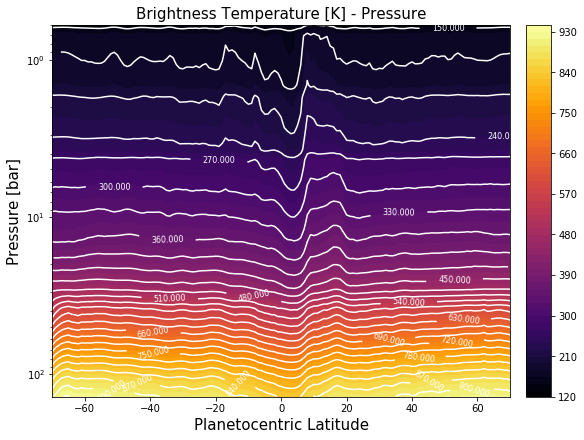

In [40]:
# Read in and plot the TB(press) grid.

lat_c = np.loadtxt('lat_2020sep.csv', delimiter=",")
pressure = np.loadtxt('press_2020sep.csv', delimiter=",")
T_lev_lat = np.loadtxt('TBpress_2020sep.csv', delimiter=",")

fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

plat=lat_c
zpress=pressure
newtemp=T_lev_lat
pnewtemp=np.transpose(newtemp)

print(plat.shape,zpress.shape,newtemp.shape,pnewtemp.shape)
cp = ax.contourf(plat,zpress,pnewtemp,cmap='inferno',levels=64)   

cp1 = ax.contour(plat,zpress,pnewtemp,colors='white',levels=30)   
ax.clabel(cp1, fontsize=8, colors='white')

    
ax.set_title('Brightness Temperature [K] - Pressure',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-70,70)
ax.set_ylim(140,0.6)
ax.set_yscale("log")

fig.colorbar(cp, ax=ax)

Text(0, 0.5, 'Coriolis Parameter [s$^{-1}$]')

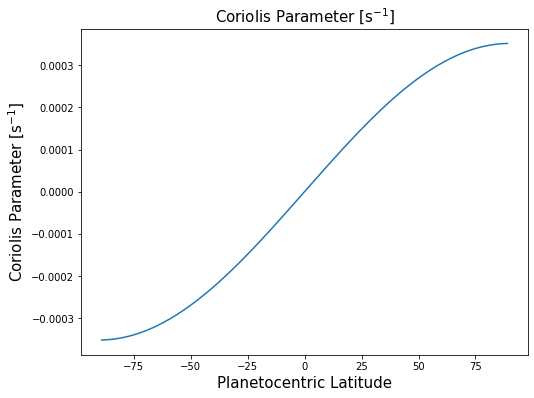

In [41]:
# Calculate the Corolis parameter
deg2rad=math.pi/180.

clatc = np.cos(lat_c*deg2rad)
slatc = np.sin(lat_c*deg2rad)

period_jupiter = 9.925
omega_jupiter = 2*math.pi/(period_jupiter*3600.)
f=2*omega_jupiter*slatc # Coriolis parameter in s-1

fig,ax=plt.subplots(figsize=(8,6))
ax.plot(lat_c,f)
ax.set_title('Coriolis Parameter [s$^{-1}$]',size=15)    
ax.set_xlabel('Planetocentric Latitude',size=15)
ax.set_ylabel('Coriolis Parameter [s$^{-1}$]',size=15)    


Number of levels= 308 179
[ 20272.98482697  20562.41072057  20871.86456697  21226.66797926
  22278.53073803  23502.66316047  24726.79558291  25875.57204707
  26018.42714044  26158.87834312  26301.82980914  26449.28864432
  26605.87703485  26760.18934895  26916.64255972  27077.44169301
  27233.89490378  27407.73180464  27581.56870549  27752.16710354
  27964.07337705  28133.59839585  28303.12341466  28491.45726736
  28641.74623139  28829.23103731  29034.50409391  29542.93207124
  30051.36004857  30559.78802589  31169.90159869  31678.32957601
  32047.32486057  32189.78161505  32360.05354936  32530.19608858
  32700.38127891  32899.71974456  33070.69916741  33241.67859025
  33441.15458357  33640.63057689  33840.06949785  34039.47354217
  34238.87758649  34438.28163081  34667.86863199  34902.13158084
  35107.11166108  35341.37460993  35575.75133716  35839.47483206
  36069.27443195  36311.69617199  36527.18216314  36769.60390319
  37000.39141283  37217.68921892  37449.04444446  37923.62363189

Text(0, 0.5, 'Pressure [bar]')

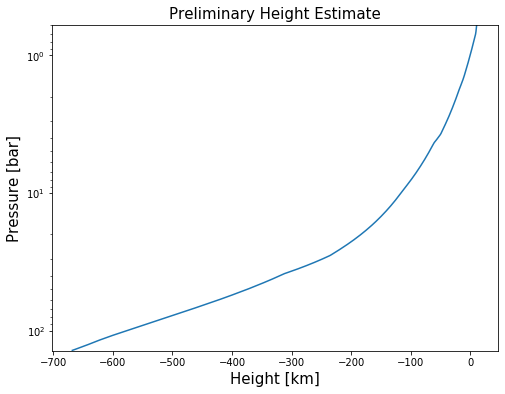

In [44]:
press_mbar = pressure*1000.0 # change from bar to mbar
press_pa = press_mbar*1e2 # change mbar to Pascal
nlev=len(pressure)
nlat=len(lat_c)
print("Number of levels=",nlev,nlat)

delta_p_lev=np.empty(shape=(nlev))
p_mid=np.empty(shape=(nlev))

for i in range(nlev-1):
    delta_p_lev[i]=press_pa[i]-press_pa[i+1]
    p_mid[i]=(press_pa[i+1]+press_pa[i])/2.
#    print(i,pressure[i],press_pa[i],delta_p_lev[i],p_mid[i])

delta_p_lev[nlev-1] = np.nan
p_mid[nlev-1] = np.nan

dz_lev_lat=np.empty(shape=(nlev,nlat))

# Based on code from L.Li, we begin using g_1bar_jupiter for dz
# However, what we reallt want is to have g as a function of pressure.
# Problem is that the computation needs dz again, so here we use a simple way to get
# the function g(z) by assuming the scale height at 1 br to be the same at all z.
# From the scale height and pressure levels we can then estimate z and compute g.
# After computing g, we can use it again to compute a better z.

g_lev=np.empty(shape=(nlev))
scale_H=27000. # metres

# Scale height is a function of temperature, so should vary with depth.
# From:
# https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
# we have T(1bar) = 165K and g(1bar) = 24.79; Double check with R
# (gas constant), we have R*T/g = 3745.2*165/24.79 = 24.93km, which is
# close to 27km (from the above website). If using the BT at 1 bar
# from the MWR data (BT ~ 180K), we have R*T/g = 27.2 km, which is
# close to 27km. 

T_lev=np.average(T_lev_lat,0)
scale_H_lev = R_jupiter*T_lev/g_1bar_jupiter # Scale height in metres

#scale_H_lev = np.empty(nlev)
#scale_H_lev.fill(scale_H)

print(scale_H_lev)

# Now do the first attempt at calculating the height grid.

tmp_z_lev=np.empty(shape=(nlev))
for i in range(nlev):
    if(press_pa[i] < 100000):
        tmp_z_lev[i] = -1 * scale_H_lev[i] * math.log(press_pa[i]/100000.0)
    else:
        tmp_z_lev[i] = (-1*scale_H_lev[i]*math.log(press_pa[i]/100000.))
        # Sets dz to be negative below the 1-bar level

#print(scale_H_lev)
        
        
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(tmp_z_lev/1e3,pressure)
ax.set_ylim(140,0.6)
ax.set_yscale("log")
ax.set_title("Preliminary Height Estimate",size=15)
ax.set_xlabel('Height [km]',size=15)
ax.set_ylabel('Pressure [bar]',size=15) 




71505413.59027499 66187043.64135004


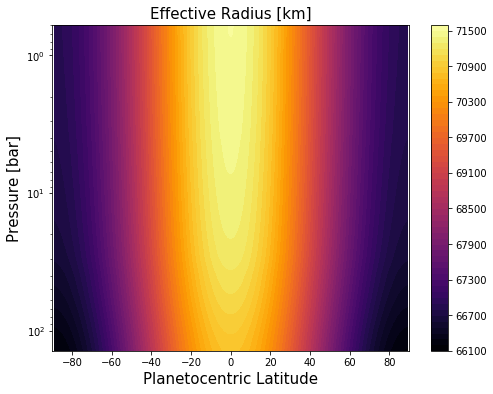

In [45]:
# Calculate the effective radius of Jupiter considering the oblateness

Req_jupiter_r = Req_jupiter + tmp_z_lev #*1e3 # for equator
Rpo_jupiter_r = Rpo_jupiter + tmp_z_lev #*1e3 # use 89N for pole

#print(Req_jupiter)
#print(tmp_z_lev*1e3)
#print(scale_H_lev)

clatc = np.cos(lat_c*deg2rad)
slatc = np.sin(lat_c*deg2rad)

r_lev_lat=np.empty(shape=(nlev,nlat))
for i in range(nlev):
    for j in range(nlat):
        tmp1=(Rpo_jupiter_r[i]*clatc[j])**2
        tmp2=(Req_jupiter_r[i]*slatc[j])**2
        r_lev_lat[i,j] = (Req_jupiter_r[i]*Rpo_jupiter_r[i])/(np.sqrt(tmp1+tmp2))

fig,ax=plt.subplots(figsize=(8,6))
ax.plot(r_lev_lat)
cp = ax.contourf(lat_c,pressure,r_lev_lat/1e3,cmap='inferno',levels=64)
          
ax.set_title('Effective Radius [km]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-90,90)
ax.set_ylim(140,0.6)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)

print(np.max(r_lev_lat),np.min(r_lev_lat))
    

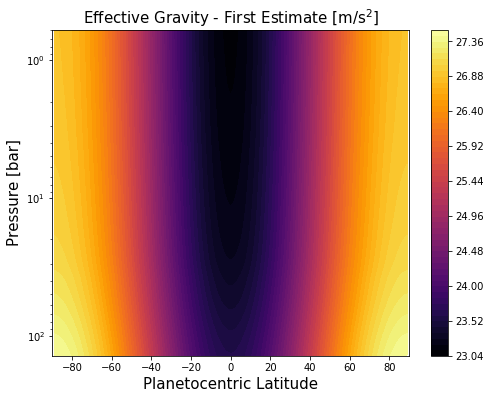

In [46]:
# Now compute the more sophisticated gravity calculation, using dz as a starting point
G = 6.67e-11 # unit: m^3*kg^-1*s^-2
M = 1.89819e27 # unit: kg
# from https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
# Gravity computation is based on the references of Jupiter_gravity.pdf
# Note P2n is Legendre Polynomial (only use n=1), 
# (https://mathworld.wolfram.com/LegendrePolynomial.html)
# We have P2(x) = 1/2*(3x^2-1); so we have 
# gr(lat_c) = GM/r_lat * (1-3/2*(req/r_lat)^2*(3*sin(lat_c)^2-1)*J2).

J2 = 1.4697e-2 # see jupiter_gravity.pdf
period_jupiter = 9.925
omega_jupiter = 2*math.pi/(period_jupiter*3600.)

fac_1 = G*M/(r_lev_lat**2)
fac_2 = np.empty(shape=(nlev,nlat))
fac_3 = np.empty(shape=(nlev,nlat))

#print(r_lev_lat[:,90])

for i in range(nlat):
    fac_2[:,i]=1.5 * J2 * ((Req_jupiter_r/r_lev_lat[:,i])**2) * (3*(slatc[i]**2)-1)
    fac_3[:,i] = (omega_jupiter**2) * r_lev_lat[:,i] * (clatc[i]**2)
    
g_lev_lat=fac_1*(1-fac_2)-fac_3

fig,ax=plt.subplots(figsize=(8,6))
cp = ax.contourf(lat_c,pressure,g_lev_lat,cmap='inferno',levels=64)
          
ax.set_title('Effective Gravity - First Estimate [m/s$^{2}$]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-90,90)
ax.set_ylim(140,0.6)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)


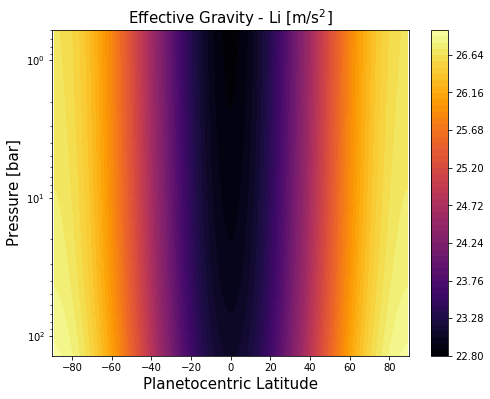

In [47]:
# Compare the gravity plot above to that derived by Liming.  
# There are some differences in the min/max of the range

grav_liming = np.loadtxt('limingli/g_lev_lat_2020sep.csv', delimiter=",")
lat_liming= np.loadtxt('limingli/Centric_latitude.txt', delimiter=",")
press_liming= np.loadtxt('limingli/Pressure.txt', delimiter=",")

fig,ax=plt.subplots(figsize=(8,6))
cp = ax.contourf(lat_liming,press_liming,grav_liming,cmap='inferno',levels=64)
          
ax.set_title('Effective Gravity - Li [m/s$^{2}$]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-90,90)
ax.set_ylim(140,0.6)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)



(179, 308) (308,) (308, 179)
(308, 179)
[-15.87603782 -15.88552705 -15.84611472 -15.83259495 -15.83914419
 -15.88228523 -15.88257048 -15.91788113 -15.97179825 -16.01589525
 -16.04382765 -16.09296582 -16.09668027 -16.09976006 -16.10103545
 -16.12654608 -16.14313612 -16.17630996 -16.206428   -16.26662629
 -16.32644481 -16.38279877 -16.42455496 -16.44431539 -16.44667171
 -16.42271738 -16.39378992 -16.37447876 -16.33505963 -16.36517228
 -16.3456803  -16.36908837 -16.36318321 -16.37729465 -16.41534861
 -16.52820761 -16.71187155 -16.89752942 -16.98889865 -16.93593727
 -16.78602055 -16.63775201 -16.61725109 -16.72332728 -16.91791757
 -17.08742611 -17.20561072 -17.22640835 -17.21288701 -17.19709938
 -17.18848783 -17.20243122 -17.25500122 -17.34198421 -17.54279391
 -17.71074127 -17.65764833 -17.42227824 -17.33676514 -17.36276419
 -17.51319567 -17.58636428 -17.59640062 -17.69978255 -17.63724427
 -17.80618218 -17.89705406 -17.77704362 -17.80680387 -17.76412714
 -17.83437437 -18.12499999 -18.74390

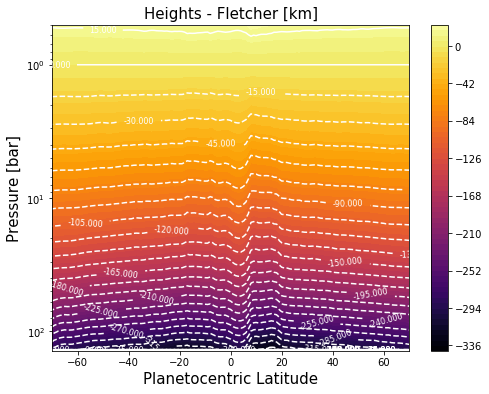

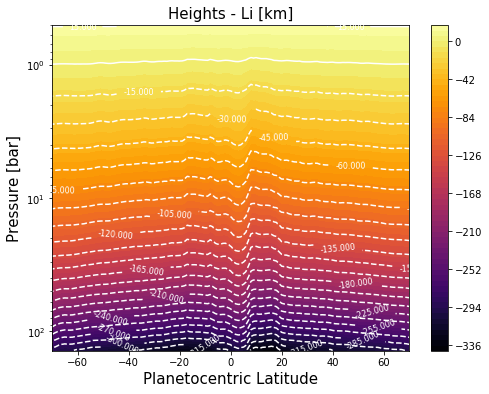

In [49]:
T_lev_mid = np.empty(shape=nlev)
density_lev = np.empty(shape=nlev)
print(T_lev_lat.shape, p_mid.shape, g_lev_lat.shape)

#print(p_mid)

h_lev_lat=np.empty(shape=(nlev,nlat))
for ii in range(nlat): 
    T_lev = T_lev_lat[ii,:]
    for jj in range(nlev-1):
        #print(T_lev.shape)
        T_lev_mid[jj] = (T_lev[jj]+T_lev[jj+1])/2.0 
    T_lev_mid[nlev-1] = np.nan
    density_lev = p_mid/(R_jupiter*T_lev_mid) #R_jupiter is gas constant.
    
    dz_lev_lat[:,ii] = delta_p_lev/(g_lev_lat[:,ii]*density_lev)
        
    #print(dz_lev_lat[:,ii])
    
    yy=np.arange(nlev)
    for jj in range(nlev-1):

        keep=np.where(yy <= jj)
        #print(jj,np.sum(dz_lev_lat[keep,ii]))
        h_lev_lat[jj,ii] = np.sum(dz_lev_lat[keep,ii]) #change dz to heights

#h_lev_lat = np.cumsum(dz_lev_lat)
print(h_lev_lat.shape)

h_lev_lat = h_lev_lat/1000 # from m to km
tmp_h_lev = np.average(h_lev_lat)

from scipy.interpolate import interp1d

height_corr=np.empty(shape=(nlat))
for ii in range(nlat):
    f=interp1d(pressure,h_lev_lat[:,ii], kind='cubic', fill_value="extrapolate")
    height_corr[ii]=f(1.0)

print(height_corr)

h_lev_lat=h_lev_lat-height_corr

fig,ax=plt.subplots(figsize=(8,6))
cp = ax.contourf(lat_c,pressure,h_lev_lat,cmap='inferno',levels=64)
cp1 = ax.contour(lat_c,pressure,h_lev_lat,colors='white',levels=30)   
ax.clabel(cp1, fontsize=8, colors='white')
          
ax.set_title('Heights - Fletcher [km]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-70,70)
ax.set_ylim(140,0.5)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)



height_liming= np.loadtxt('limingli/h_lev_lat.csv', delimiter=",")

fig,ax=plt.subplots(figsize=(8,6))
cp = ax.contourf(lat_liming,press_liming,height_liming,cmap='inferno',levels=64)
cp1 = ax.contour(lat_liming,press_liming,height_liming,colors='white',levels=30)   
ax.clabel(cp1, fontsize=8, colors='white')
ax.set_title('Heights - Li [km]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)

ax.set_xlim(-70,70)
ax.set_ylim(140,0.5)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)



(308, 179)
71509933.97645006 66564113.93749203


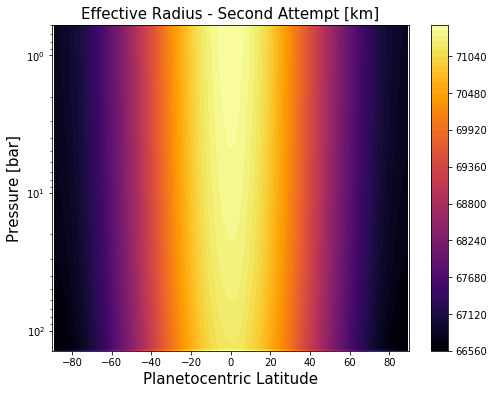

In [50]:
# At this stage, both the heights and the gravity look subtly different to what Liming has.
# But I think the idea was to go around the loop again - use the new heights to calculate the gravity.

# Calculate the effective radius of Jupiter considering the oblateness

Req_jupiter_r = Req_jupiter + h_lev_lat*1e3 # for equator
Rpo_jupiter_r = Rpo_jupiter + h_lev_lat*1e3 # use 89N for pole

print(Req_jupiter_r.shape)
#print(tmp_z_lev*1e3)
#print(scale_H_lev)

clatc = np.cos(lat_c*deg2rad)
slatc = np.sin(lat_c*deg2rad)

r_lev_lat=np.empty(shape=(nlev,nlat))
for i in range(nlev):
    for j in range(nlat):
        tmp1=(Rpo_jupiter_r[i,j]*clatc[j])**2
        tmp2=(Req_jupiter_r[i,j]*slatc[j])**2
        r_lev_lat[i,j] = (Req_jupiter_r[i,j]*Rpo_jupiter_r[i,j])/(np.sqrt(tmp1+tmp2))

fig,ax=plt.subplots(figsize=(8,6))
ax.plot(r_lev_lat)
cp = ax.contourf(lat_c,pressure,r_lev_lat/1e3,cmap='inferno',levels=64)
          
ax.set_title('Effective Radius - Second Attempt [km]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-90,90)
ax.set_ylim(140,0.6)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)

print(np.max(r_lev_lat),np.min(r_lev_lat))
    

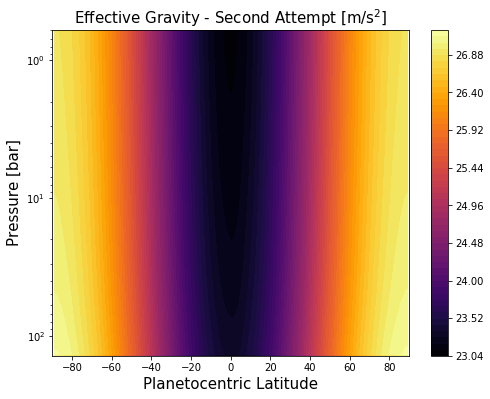

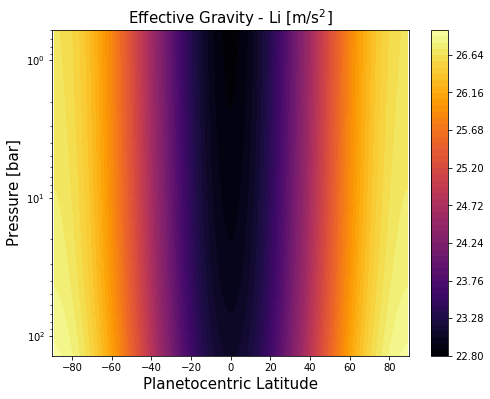

In [51]:
# With the updated height grid above, recalculate the gravity


# Now compute the more sophisticated gravity calculation, using dz as a starting point
G = 6.67e-11 # unit: m^3*kg^-1*s^-2
M = 1.89819e27 # unit: kg
# from https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
# Gravity computation is based on the references of Jupiter_gravity.pdf
# Note P2n is Legendre Polynomial (only use n=1), 
# (https://mathworld.wolfram.com/LegendrePolynomial.html)
# We have P2(x) = 1/2*(3x^2-1); so we have 
# gr(lat_c) = GM/r_lat * (1-3/2*(req/r_lat)^2*(3*sin(lat_c)^2-1)*J2).

J2 = 1.4697e-2 # see jupiter_gravity.pdf
period_jupiter = 9.925
omega_jupiter = 2*math.pi/(period_jupiter*3600.)

fac_1 = G*M/(r_lev_lat**2)
fac_2 = np.empty(shape=(nlev,nlat))
fac_3 = np.empty(shape=(nlev,nlat))

#print(r_lev_lat[:,90])

for i in range(nlat):
    fac_2[:,i]=1.5 * J2 * ((Req_jupiter_r[:,i]/r_lev_lat[:,i])**2) * (3*(slatc[i]**2)-1)
    fac_3[:,i] = (omega_jupiter**2) * r_lev_lat[:,i] * (clatc[i]**2)
    
g_lev_lat=fac_1*(1-fac_2)-fac_3

fig,ax=plt.subplots(figsize=(8,6))
cp = ax.contourf(lat_c,pressure,g_lev_lat,cmap='inferno',levels=64)
          
ax.set_title('Effective Gravity - Second Attempt [m/s$^{2}$]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-90,90)
ax.set_ylim(140,0.6)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)


grav_liming = np.loadtxt('limingli/g_lev_lat_2020sep.csv', delimiter=",")
lat_liming= np.loadtxt('limingli/Centric_latitude.txt', delimiter=",")
press_liming= np.loadtxt('limingli/Pressure.txt', delimiter=",")

fig,ax=plt.subplots(figsize=(8,6))
cp = ax.contourf(lat_liming,press_liming,grav_liming,cmap='inferno',levels=64)
          
ax.set_title('Effective Gravity - Li [m/s$^{2}$]',size=15)    
ax.set_ylabel('Pressure [bar]',size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
       # 
ax.set_xlim(-90,90)
ax.set_ylim(140,0.6)
ax.set_yscale("log")
fig.colorbar(cp, ax=ax)



44.9 44.9
44.9 44.9


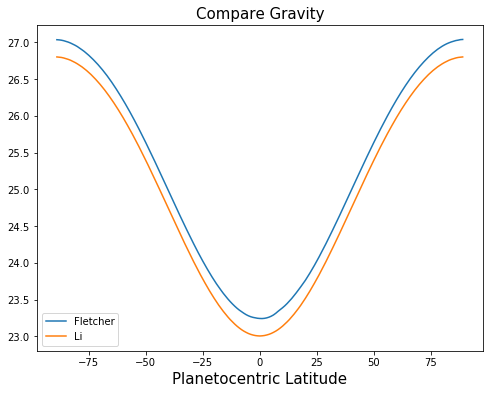

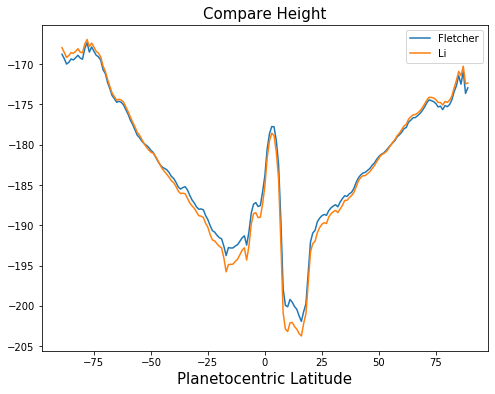

In [53]:
fig,ax=plt.subplots(figsize=(8,6))

ref=200

print(pressure[ref],press_liming[ref])
ax.plot(lat_c,g_lev_lat[ref,:],label='Fletcher')
ax.plot(lat_liming,grav_liming[ref,:],label='Li')
ax.set_title("Compare Gravity",size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)

ax.legend()
fig,ax=plt.subplots(figsize=(8,6))

print(pressure[ref],press_liming[ref])
ax.plot(lat_c,h_lev_lat[ref,:],label='Fletcher')
ax.plot(lat_liming,height_liming[ref,:],label='Li')
ax.set_title("Compare Height",size=15)
ax.set_xlabel('Planetocentric Latitude',size=15)
ax.legend()